In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

# Librerias y funciones

In [2]:
#Librerias
library(earth)
library(mgcv)
library(caret)     # para optimizar proceso de tunning

#Otros de manipulación de datos
library(tseries)  #manipulación series de tiempo
library(tsfeatures) # Obtención de features relevantes
library(tidyverse) #Data manipulation
library(fields)  #Data manipulation
library(forecast)  # para función pronosticos
library(quantmod) #Para obtener datos financiera
library(dygraphs)  # data visualization
library(dplyr)    # data wrangling
library(ggplot2)  # gráficos
theme_set(theme_bw())
options(warn = - 1)

if (!requireNamespace("quantmod", quietly = TRUE)) install.packages("quantmod")
if (!requireNamespace("dygraphs", quietly = TRUE)) install.packages("dygraphs")
if (!requireNamespace("RColorBrewer", quietly = TRUE)) install.packages("RColorBrewer")

library(quantmod)
library(dygraphs)
library(RColorBrewer)
library(fBasics)
library(PerformanceAnalytics)
library(xts)
library(quantmod)
library(ggplot2)
library(tseries)
library(dygraphs)
library(dplyr)
library(stats)
library(MTS)
library(urca)
library(vars)
library(tsDyn)
options(warn = - 1) 

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘packa

In [3]:
precios <-function(simbolo)
{
  ##Obtener precios stocks de Yahoo FInance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios cierre 4:
  datos <- datos[,4]
  ##Para hacerlo datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}

# DESCARGAR LAS SERIES FINANCIERAS
Se van a descargar las series  RYLD, TSLA, TM Y GM para el periodo de 2019-04-22 y 2022-12-31

- RYLD: a serie RYDL se refiere a los bonos del Tesoro de Estados Unidos de largo plazo, conocidos como "RYDEX Series Trust". RYDEX es una firma de inversión que ofrece una variedad de fondos, incluidos los fondos cotizados en bolsa (ETF), y "Series Trust" puede referirse a una serie de fondos dentro de la familia de fondos de RYDEX.

- TSLA" es el símbolo de cotización (ticker) de las acciones de Tesla, Inc. Tesla es una empresa estadounidense fundada por Elon Musk y otros cofundadores en 2003. Es conocida principalmente por sus vehículos eléctricos, así como por sus productos y servicios de energía limpia.

- TM: símbolo de cotización (ticker) para las acciones de Toyota Motor Corporation. Toyota es una de las mayores fabricantes de automóviles en el mundo, conocida por su amplia gama de vehículos, incluyendo sedanes, SUVs, camiones y vehículos híbridos.

- GM: símbolo de cotización (ticker) para las acciones de General Motors Company. General Motors, comúnmente conocida como GM, es una de las mayores fabricantes de automóviles en el mundo. Fundada en 1908, GM es conocida por sus marcas como Chevrolet, GMC, Cadillac y Buick, entre otras.



In [4]:
# Periodo de consulta de las series
start_str = "2019-04-22"
end_str = "2022-12-31"
start<-format(as.Date(start_str),"%Y-%m-%d")
end<-format(as.Date(end_str),"%Y-%m-%d")

In [5]:
# Descargar las series
precios("RYLD")
precios("TSLA")
precios("TM")
precios("GM")

In [6]:
Pr <- merge(Cl(RYLD), Cl(TSLA), Cl(TM), Cl(GM)) %>% na.omit()

# Renombrar las columnas para que sean más legibles
colnames(Pr) <- c("RYLD", "TSLA", "TM", "GM")
head(Pr)
start_str <- start_str
end_str <- end_str

# Crear el gráfico interactivo con dygraphs
Precios <- dygraph(Pr, main="Precios de RYLD, TSLA, TM, GM") %>%
  dyAxis("y", label = "Precios") %>%
  dyRangeSelector(dateWindow = c(start_str, end_str)) %>%
  dyOptions(colors = brewer.pal(4, "Set1"))

Precios

             RYLD     TSLA     TM    GM
2019-04-22 24.995 17.51667 124.16 39.50
2019-04-23 25.157 17.59333 124.94 39.83
2019-04-24 25.189 17.24400 122.88 39.72
2019-04-25 25.130 16.50867 123.19 39.11
2019-04-26 25.225 15.67600 123.62 39.68
2019-04-29 25.250 16.09800 123.81 40.01

HTML widgets cannot be represented in plain text (need html)

In [29]:
Pr_index <- fortify.zoo(Pr)
Pr_index

Index,RYLD,TSLA,TM,GM
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2019-04-22,24.995,17.51667,124.16,39.50
2019-04-23,25.157,17.59333,124.94,39.83
2019-04-24,25.189,17.24400,122.88,39.72
2019-04-25,25.130,16.50867,123.19,39.11
2019-04-26,25.225,15.67600,123.62,39.68
2019-04-29,25.250,16.09800,123.81,40.01
2019-04-30,25.211,15.91267,123.60,38.95
2019-05-01,25.124,15.60067,122.92,38.75
2019-05-02,25.141,16.27333,122.59,38.25


In [30]:
#Partimos serie para train & test
h <- round(nrow(Pr_index)*0.05, digits = 0 )
h
Pr_tra <- Pr_index[1:(nrow(Pr_index) - h), ]
Pr_tes<- Pr_index[(nrow(Pr_index) - h + 1):nrow(Pr_index), ]

head(Pr_tra)
tail(Pr_tra)
head(Pr_tes)
tail(Pr_tes)


[1] 47

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
881,2022-10-17,19.33,219.35,136.16,33.57
882,2022-10-18,19.50,220.19,134.26,34.25
883,2022-10-19,19.26,222.04,132.97,33.63
884,2022-10-20,19.01,207.28,133.24,33.44
885,2022-10-21,19.34,214.44,133.76,35.00
886,2022-10-24,19.18,211.25,134.74,35.72


,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
887,2022-10-25,19.35,222.42,137.07,37.01
888,2022-10-26,19.41,224.64,137.93,37.86
889,2022-10-27,19.45,225.09,136.47,38.16
890,2022-10-28,19.56,228.52,139.52,38.85
891,2022-10-31,19.58,227.54,138.81,39.25
892,2022-11-01,19.58,227.82,135.16,39.35


,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
928,2022-12-22,18.90,125.35,137.00,33.53
929,2022-12-23,18.95,123.15,137.14,33.83
930,2022-12-27,18.92,109.10,136.16,33.32
931,2022-12-28,18.78,112.71,134.13,32.53
932,2022-12-29,18.84,121.82,137.41,33.67
933,2022-12-30,18.81,123.18,136.58,33.64


In [31]:
head(Pr_tra)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


# Aplicar el modelo VAR



## Revisión de cointegración



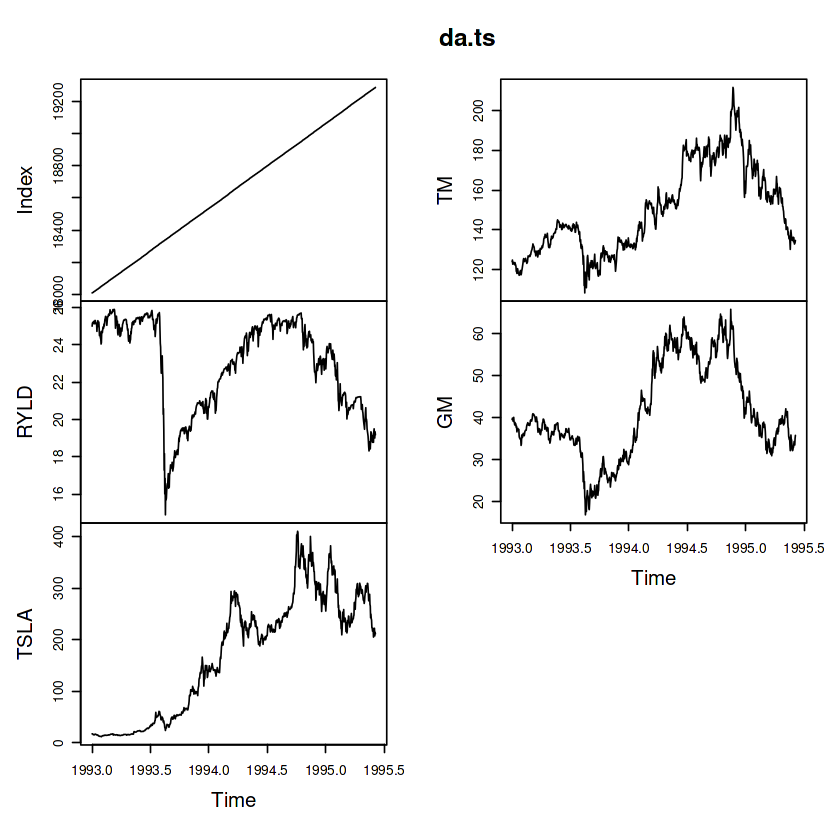

In [34]:
da.ts=ts(Pr_tra, start=c(2019-04-22), frequency=365)
plot(da.ts)

In [35]:
johatest=ca.jo(da.ts, type = "trace", K=2, ecdet ="none", spec = "longrun") #
summary(johatest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 2.574099e-02 1.468845e-02 4.023500e-03 2.345548e-03 2.358420e-06

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 4 |  0.00  6.50  8.18 11.65
r <= 3 |  2.08 15.66 17.95 23.52
r <= 2 |  5.64 28.71 31.52 37.22
r <= 1 | 18.72 45.23 48.28 55.43
r = 0  | 41.78 66.49 70.60 78.87

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           Index.l2     RYLD.l2    TSLA.l2      TM.l2     GM.l2
Index.l2    1.00000    1.000000   1.000000   1.000000  1.000000
RYLD.l2  -534.92874 -130.739874 160.744982 -33.700204 21.606786
TSLA.l2   -23.94253   -4.715958  -2.557298  -4.102720 -1.796127
TM.l2      89.37261  -37.356833  -4.116693  -5.650436 -4.634456
GM.l2     101.41798  109.553678 -10.404872  -2.367609  5.354956

Weights W:
(This is the loading matrix)

             Index.l2  

In [22]:
# Supongamos que tu data frame se llama df
df <- data.frame(
  Date = as.Date(c("2019-04-22", "2019-04-23", "2019-04-24", "2019-04-25", "2019-04-26", "2019-04-29")),
  RYLD = c(24.995, 25.157, 25.189, 25.130, 25.225, 25.250),
  TSLA = c(17.51667, 17.59333, 17.24400, 16.50867, 15.67600, 16.09800),
  TM = c(124.16, 124.94, 122.88, 123.19, 123.62, 123.81),
  GM = c(39.50, 39.83, 39.72, 39.11, 39.68, 40.01)
)

# Configurar el data frame correctamente
rownames(df) <- df$Date
df$Date <- NULL

# Verificar la estructura del data frame
str(df)

# Convertir data frame a matriz (requerido por ca.jo)
df_matrix <- as.matrix(df)

# Realizar la prueba de cointegración de Johansen
johansen_test <- ca.jo(df_matrix, type = "trace", K = 2, ecdet = "none", spec = "longrun")

# Mostrar los resultados
summary(johansen_test)


'data.frame':	6 obs. of  4 variables:
 $ RYLD: num  25 25.2 25.2 25.1 25.2 ...
 $ TSLA: num  17.5 17.6 17.2 16.5 15.7 ...
 $ TM  : num  124 125 123 123 124 ...
 $ GM  : num  39.5 39.8 39.7 39.1 39.7 ...


ERROR: Error in ca.jo(df_matrix, type = "trace", K = 2, ecdet = "none", spec = "longrun"): 
Insufficient degrees of freedom.



In [24]:
library(tseries)
adf.test(Pr_tra[,2])
adf.test(Pr_tra[,3])
adf.test(Pr_tra[,4])
adf.test(Pr_tra[,5])



	Augmented Dickey-Fuller Test

data:  Pr_tra[, 2]
Dickey-Fuller = -1.945, Lag order = 9, p-value = 0.6016
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr_tra[, 3]
Dickey-Fuller = -1.9481, Lag order = 9, p-value = 0.6003
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr_tra[, 4]
Dickey-Fuller = -1.1193, Lag order = 9, p-value = 0.9195
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr_tra[, 5]
Dickey-Fuller = -1.3697, Lag order = 9, p-value = 0.8451
alternative hypothesis: stationary


In [36]:
# Diferenciar las series no estacionarias
# Diferenciar las series de precios
RYLD_diff <- diff(Pr_index$RYLD, differences = 1)
TSLA_diff <- diff(Pr_index$TSLA, differences = 1)
TM_diff <- diff(Pr_index$TM, differences = 1)
GM_diff <- diff(Pr_index$GM, differences = 1)

# Unir las series diferenciadas en un único data frame
merged_prices_diff <- cbind.data.frame(RYLD_diff, TSLA_diff, TM_diff, GM_diff)


In [37]:
merged_prices_diff

RYLD_diff,TSLA_diff,TM_diff,GM_diff
<dbl>,<dbl>,<dbl>,<dbl>
0.161998749,0.07666588,0.77999878,0.33000183
0.031999588,-0.34933281,-2.06000519,-0.11000061
-0.059000015,-0.73533249,0.31000519,-0.61000061
0.095001221,-0.83266735,0.43000031,0.56999969
0.024999619,0.42199993,0.18999481,0.32999802
-0.038999557,-0.18533230,-0.20999908,-1.05999756
-0.086999893,-0.31200027,-0.68000031,-0.20000076
0.017000198,0.67266560,-0.33000183,-0.50000000
0.158998489,0.72866821,1.06000519,0.54999924


In [27]:
# Verificar de nuevo la estacionariedad
adf.test(merged_prices_diff$RYLD)
adf.test(merged_prices_diff$TSLA)
adf.test(merged_prices_diff$TM)
adf.test(merged_prices_diff$GM)


	Augmented Dickey-Fuller Test

data:  merged_prices_diff$RYLD
Dickey-Fuller = -8.0814, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  merged_prices_diff$TSLA
Dickey-Fuller = -9.2478, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  merged_prices_diff$TM
Dickey-Fuller = -10.768, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  merged_prices_diff$GM
Dickey-Fuller = -9.895, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


## Modelación con la librería MARS




In [39]:
nivelk=VARselect(merged_prices_diff, lag.max = 7, type = "const")
nivelk$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      1      2

In [40]:
m0=vars::VAR(merged_prices_diff, p=2)

In [41]:
summary(m0)


VAR Estimation Results:
Endogenous variables: RYLD_diff, TSLA_diff, TM_diff, GM_diff 
Deterministic variables: const 
Sample size: 930 
Log Likelihood: -6346.802 
Roots of the characteristic polynomial:
0.5629 0.412 0.2887 0.2887 0.2812 0.2812 0.1802 0.1441
Call:
vars::VAR(y = merged_prices_diff, p = 2)


Estimation results for equation RYLD_diff: 
RYLD_diff = RYLD_diff.l1 + TSLA_diff.l1 + TM_diff.l1 + GM_diff.l1 + RYLD_diff.l2 + TSLA_diff.l2 + TM_diff.l2 + GM_diff.l2 + const 

               Estimate Std. Error t value Pr(>|t|)    
RYLD_diff.l1 -1.387e-01  4.146e-02  -3.345 0.000855 ***
TSLA_diff.l1  3.553e-04  1.149e-03   0.309 0.757293    
TM_diff.l1   -1.614e-03  4.517e-03  -0.357 0.721017    
GM_diff.l1    1.487e-02  1.012e-02   1.470 0.141930    
RYLD_diff.l2  2.743e-01  4.161e-02   6.593 7.27e-11 ***
TSLA_diff.l2 -2.104e-03  1.150e-03  -1.830 0.067595 .  
TM_diff.l2   -7.818e-05  4.512e-03  -0.017 0.986179    
GM_diff.l2   -1.894e-02  1.009e-02  -1.876 0.060927 .  
const       

### Modelación con MTS

In [42]:
VARorder(merged_prices_diff)

selected order: aic =  2 
selected order: bic =  0 
selected order: hq =  2 
Summary table:  
       p    AIC    BIC     HQ    M(p) p-value
 [1,]  0 2.4738 2.4738 2.4738  0.0000  0.0000
 [2,]  1 2.4539 2.5369 2.4856 49.5841  0.0000
 [3,]  2 2.4059 2.5720 2.4692 74.9077  0.0000
 [4,]  3 2.4311 2.6802 2.5261  8.2821  0.9400
 [5,]  4 2.4365 2.7687 2.5632 26.0077  0.0539
 [6,]  5 2.4510 2.8663 2.6094 17.8070  0.3353
 [7,]  6 2.4647 2.9629 2.6547 18.5089  0.2949
 [8,]  7 2.4577 3.0390 2.6793 36.7762  0.0023
 [9,]  8 2.4651 3.1294 2.7184 23.8195  0.0935
[10,]  9 2.4620 3.2094 2.7471 32.9700  0.0075
[11,] 10 2.4752 3.3056 2.7919 18.5853  0.2908
[12,] 11 2.4854 3.3989 2.8338 21.0232  0.1776
[13,] 12 2.5054 3.5019 2.8854 12.5226  0.7073
[14,] 13 2.5261 3.6057 2.9379 11.7476  0.7612


In [43]:
m1=MTS::VAR(merged_prices_diff,2)

Constant term: 
Estimates:  -0.005813678 0.1381135 0.009695115 -0.004087747 
Std.Error:  0.008501149 0.2660752 0.07498849 0.03548096 
AR coefficient matrix 
AR( 1 )-matrix 
        [,1]      [,2]     [,3]    [,4]
[1,] -0.1387  0.000355 -0.00161  0.0149
[2,]  1.1687 -0.036652  0.00362 -0.3614
[3,] -1.0787  0.013569  0.01033  0.0919
[4,] -0.0592  0.009652 -0.00722 -0.0113
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0415 0.00115 0.00452 0.0101
[2,] 1.2978 0.03597 0.14138 0.3166
[3,] 0.3658 0.01014 0.03984 0.0892
[4,] 0.1731 0.00480 0.01885 0.0422
AR( 2 )-matrix 
      [,1]     [,2]      [,3]    [,4]
[1,] 0.274 -0.00210 -7.82e-05 -0.0189
[2,] 2.081 -0.00173 -3.53e-02  0.0181
[3,] 0.217 -0.00935  8.48e-03  0.1364
[4,] 0.419 -0.00825 -3.36e-02 -0.0123
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0416 0.00115 0.00451 0.0101
[2,] 1.3022 0.03599 0.14122 0.3159
[3,] 0.3670 0.01014 0.03980 0.0890
[4,] 0.1737 0.00480 0.01883 0.0421
  
Residuals cov-mtx: 
           [,1] 

Ljung-Box Statistics:  
          m       Q(m)     df    p-value
 [1,]   1.000     0.179  -5.000     1.00
 [2,]   2.000     0.855  11.000     1.00
 [3,]   3.000     6.491  27.000     1.00
 [4,]   4.000    34.369  43.000     0.82
 [5,]   5.000    51.823  59.000     0.73
 [6,]   6.000    68.043  75.000     0.70
 [7,]   7.000   102.567  91.000     0.19
 [8,]   8.000   129.071 107.000     0.07
 [9,]   9.000   169.167 123.000     0.00
[10,]  10.000   184.209 139.000     0.01
[11,]  11.000   201.709 155.000     0.01
[12,]  12.000   212.929 171.000     0.02
[13,]  13.000   223.775 187.000     0.03
[14,]  14.000   246.896 203.000     0.02
[15,]  15.000   271.583 219.000     0.01
[16,]  16.000   289.971 235.000     0.01
[17,]  17.000   313.745 251.000     0.00
[18,]  18.000   333.728 267.000     0.00
[19,]  19.000   373.977 283.000     0.00
[20,]  20.000   382.449 299.000     0.00
[21,]  21.000   397.608 315.000     0.00
[22,]  22.000   409.376 331.000     0.00
[23,]  23.000   428.760 347.000  

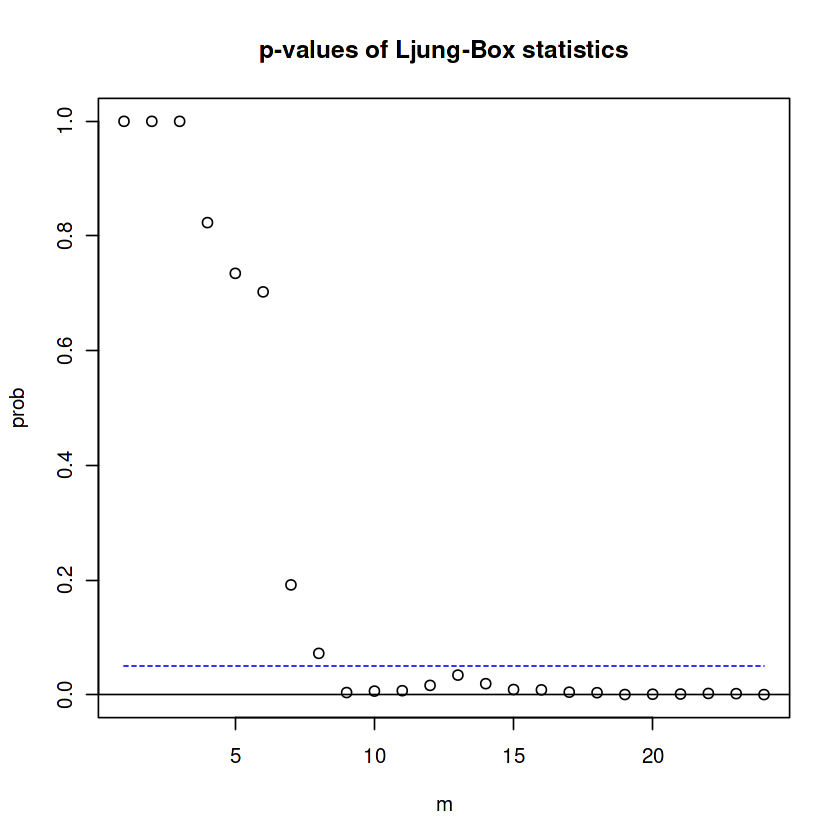

In [44]:
resi=m1$residuals
mq(resi, adj=21)

In [89]:
m2=refVAR(m1,thres = 1.96)

Constant term: 
Estimates:  0 0 0 0 
Std.Error:  0 0 0 0 
AR coefficient matrix 
AR( 1 )-matrix 
       [,1] [,2] [,3] [,4]
[1,] -0.108    0    0    0
[2,]  0.000    0    0    0
[3,] -0.706    0    0    0
[4,]  0.000    0    0    0
standard error 
       [,1] [,2] [,3] [,4]
[1,] 0.0321    0    0    0
[2,] 0.0000    0    0    0
[3,] 0.2791    0    0    0
[4,] 0.0000    0    0    0
AR( 2 )-matrix 
      [,1] [,2]    [,3]    [,4]
[1,] 0.264    0  0.0000 -0.0225
[2,] 0.000    0  0.0000  0.0000
[3,] 0.000    0  0.0000  0.1511
[4,] 0.336    0 -0.0396  0.0000
standard error 
       [,1] [,2]   [,3]    [,4]
[1,] 0.0386    0 0.0000 0.00945
[2,] 0.0000    0 0.0000 0.00000
[3,] 0.0000    0 0.0000 0.06909
[4,] 0.1517    0 0.0178 0.00000
  
Residuals cov-mtx: 
                      resi                    
     0.06676625  0.7748696 0.2886429 0.1575905
resi 0.77486956 65.4370454 4.9776624 2.7305345
     0.28864286  4.9776624 5.1900296 1.2648570
     0.15759051  2.7305345 1.2648570 1.1654655
  
det(

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      18.5     4.0     1.00
 [2,]   2.0      30.3    20.0     0.07
 [3,]   3.0      36.6    36.0     0.44
 [4,]   4.0      64.4    52.0     0.12
 [5,]   5.0      79.7    68.0     0.16
 [6,]   6.0      96.2    84.0     0.17
 [7,]   7.0     131.7   100.0     0.02
 [8,]   8.0     160.8   116.0     0.00
 [9,]   9.0     204.7   132.0     0.00
[10,]  10.0     221.1   148.0     0.00
[11,]  11.0     238.9   164.0     0.00
[12,]  12.0     250.0   180.0     0.00
[13,]  13.0     261.2   196.0     0.00
[14,]  14.0     285.4   212.0     0.00
[15,]  15.0     309.8   228.0     0.00
[16,]  16.0     327.8   244.0     0.00
[17,]  17.0     353.4   260.0     0.00
[18,]  18.0     372.5   276.0     0.00
[19,]  19.0     414.4   292.0     0.00
[20,]  20.0     423.0   308.0     0.00
[21,]  21.0     439.0   324.0     0.00
[22,]  22.0     450.3   340.0     0.00
[23,]  23.0     470.0   356.0     0.00
[24,]  24.0     510.3   372.0     0.00


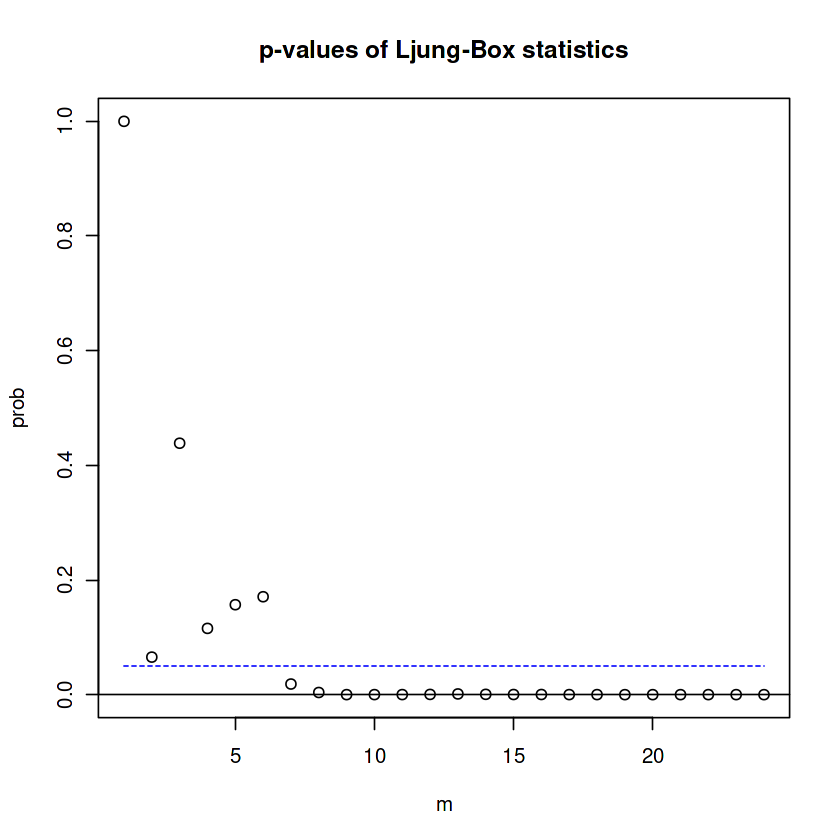

In [90]:
resi2=m2$residuals
mq(resi2, adj=12)

# impulso respuesta

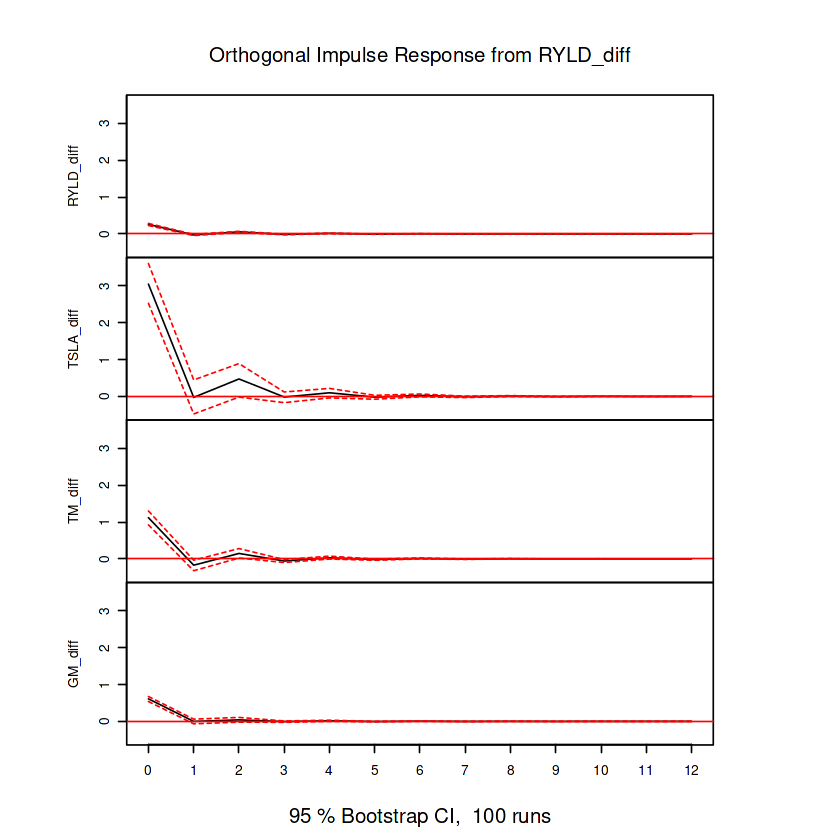

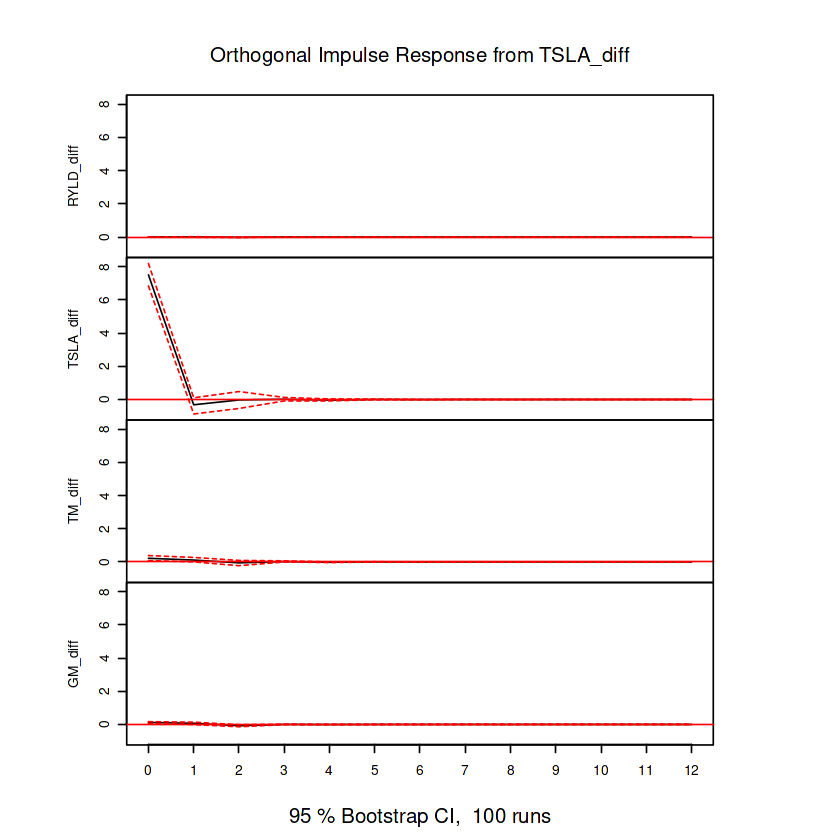

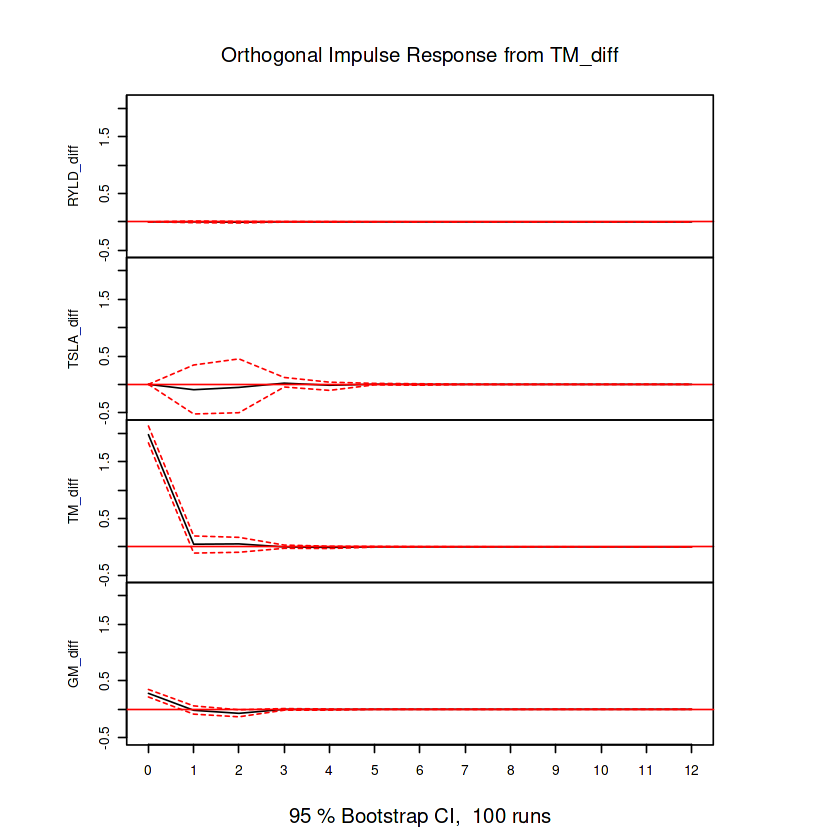

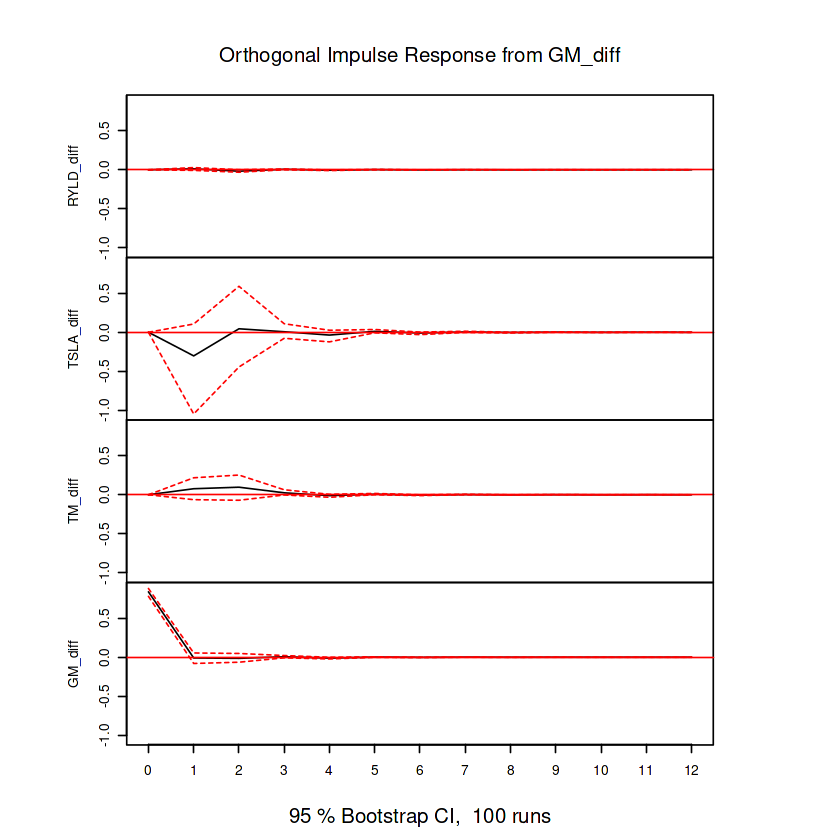

In [91]:
m1irf = irf(m0, n.ahead = 12, boot = TRUE)
plot(m1irf) 

## Predicción

In [94]:
nrow(Pr_tes)

[1] 47

In [95]:
predm2=VARpred(m2, 47)  #Podemos generar un pronóstico a 6 trimestres adelante.
predm2

orig  932 
Forecasts at origin:  932 
       RYLD_diff TSLA_diff    TM_diff    GM_diff
 [1,] -6.533e-03         0  1.934e-01 -1.098e-01
 [2,] -6.535e-03         0  7.802e-05  2.280e-02
 [3,]  1.446e-03         0 -1.197e-02 -9.852e-03
 [4,] -2.391e-03         0  2.424e-03 -2.196e-03
 [5,]  8.605e-04         0  1.992e-04  9.594e-04
 [6,] -6.742e-04         0 -9.390e-04 -8.986e-04
 [7,]  2.781e-04         0  6.207e-04  2.809e-04
 [8,] -1.876e-04         0 -3.320e-04 -1.891e-04
 [9,]  8.729e-05         0  1.749e-04  6.877e-05
[10,] -5.466e-05         0 -9.016e-05 -4.983e-05
[11,]  2.737e-05         0  4.896e-05  2.237e-05
[12,] -1.625e-05         0 -2.684e-05 -1.478e-05
[13,]  8.470e-06         0  1.485e-05  7.249e-06
[14,] -4.868e-06         0 -8.209e-06 -4.391e-06
[15,]  2.596e-06         0  4.530e-06  2.255e-06
[16,] -1.465e-06         0 -2.495e-06 -1.309e-06
[17,]  7.922e-07         0  1.375e-06  6.920e-07
[18,] -4.425e-07         0 -7.567e-07 -3.930e-07
[19,]  2.411e-07         0  4.1

RYLD_diff,TSLA_diff,TM_diff,GM_diff
-6.532669e-03,0,1.933884e-01,-1.097625e-01
-6.534574e-03,0,7.802184e-05,2.280186e-02
1.445996e-03,0,-1.197041e-02,-9.851559e-03
-2.391349e-03,0,2.424250e-03,-2.196355e-03
8.604695e-04,0,1.992371e-04,9.594092e-04
-6.742129e-04,0,-9.390050e-04,-8.986425e-04
2.781264e-04,0,6.207064e-04,2.809175e-04
-1.876455e-04,0,-3.320212e-04,-1.891047e-04
8.728745e-05,0,1.748531e-04,6.876800e-05
-5.466026e-05,0,-9.016364e-05,-4.983204e-05


In [96]:
nhor=47 #pasos en el pronóstico.
nr_lev <- nrow(Pr)
mr_lev= as.matrix(Pr)
tail(mr_lev)
str(mr_lev)

,RYLD,TSLA,TM,GM
2022-12-22,18.90,125.35,137.00,33.53
2022-12-23,18.95,123.15,137.14,33.83
2022-12-27,18.92,109.10,136.16,33.32
2022-12-28,18.78,112.71,134.13,32.53
2022-12-29,18.84,121.82,137.41,33.67
2022-12-30,18.81,123.18,136.58,33.64


 num [1:933, 1:4] 25 25.2 25.2 25.1 25.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:933] "2019-04-22" "2019-04-23" "2019-04-24" "2019-04-25" ...
  ..$ : chr [1:4] "RYLD" "TSLA" "TM" "GM"


In [98]:
m.varf_lev_ft <- rbind(mr_lev[,1:4], matrix(NA, nhor,4 ))
head(m.varf_lev_ft)
tail(m.varf_lev_ft)

,RYLD,TSLA,TM,GM
2019-04-22,24.995,17.51667,124.16,39.50
2019-04-23,25.157,17.59333,124.94,39.83
2019-04-24,25.189,17.24400,122.88,39.72
2019-04-25,25.130,16.50867,123.19,39.11
2019-04-26,25.225,15.67600,123.62,39.68
2019-04-29,25.250,16.09800,123.81,40.01


,RYLD,TSLA,TM,GM
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA


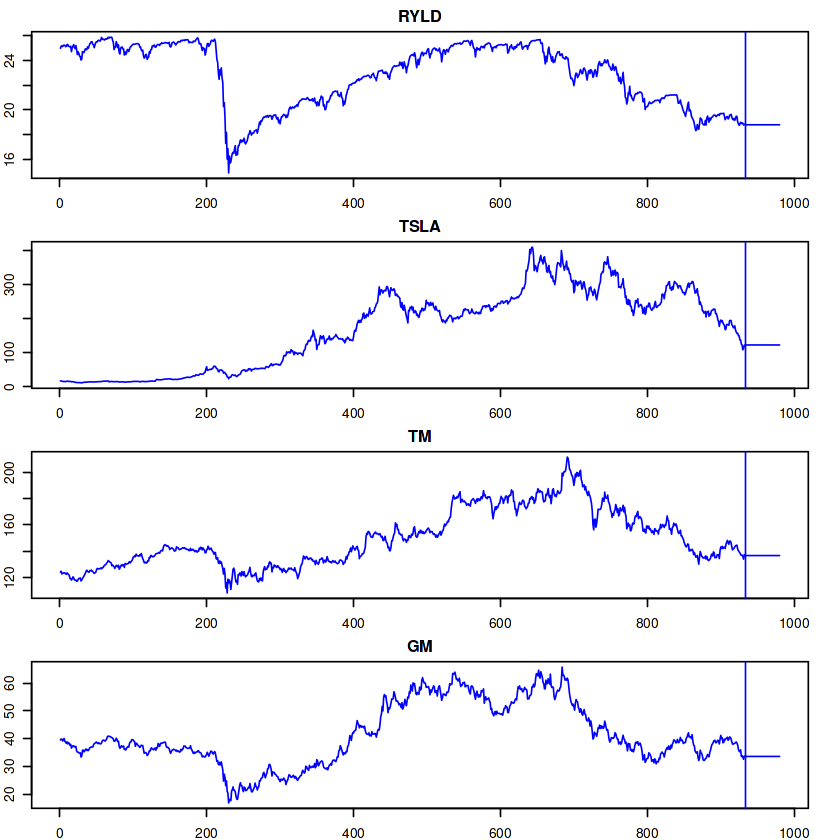

In [99]:
m.ft_df <- predm2$pred
for(h in (nr_lev+1):(nr_lev+nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h,] <- m.varf_lev_ft[h-1,] + m.ft_df[hf,]
}
str.main=c("RYLD","TSLA","TM","GM")
par(mfrow=c(4,1), mar=c(2,2,2,2))
for(i in 1:4) {
  df <- m.varf_lev_ft[,i]
  matplot(df, type=c("l"), col = c("blue"), 
          main = str.main[i]) 
  abline(v=nr_lev, col="blue")
}

In [119]:
# Obtener el número total de filas
numero_filas <- nrow(m.varf_lev_ft)

# Seleccionar los últimos 47 registros
ultimos_47 <- m.varf_lev_ft[(numero_filas - 46):numero_filas, 1]

pred_VAR = as.numeric(ultimos_47[1:length(ultimos_47)])


In [104]:
pred_ARDL <- c(19.45807,
19.48071,
19.49883,
19.51332,
19.52491,
19.53418,
19.5416,
19.54754,
19.55229,
19.55609,
19.55913,
19.56156,
19.5635,
19.56506,
19.5663,
19.5673,
19.5681,
19.56873,
19.56924,
19.56965,
19.56998,
19.57024,
19.57045,
19.57062,
19.57075,
19.57086,
19.57094,
19.57101,
19.57106,
19.57111,
19.57114,
19.57117,
19.57119,
19.57121,
19.57123,
19.57124,
19.57125,
19.57125,
19.57126,
19.57126,
19.57127,
19.57127,
19.57127,
19.57128,
19.57128,
19.57128,
19.57128)

In [121]:
Pr_tes$Pred_VAR <- pred_VAR
Pr_tes$Pred_ARDL <- pred_ARDL
Pr_tes

,Index,RYLD,TSLA,TM,GM,Pred_VAR,Pred_ARDL
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
887,2022-10-25,19.35,222.42,137.07,37.01,18.80347,19.45807
888,2022-10-26,19.41,224.64,137.93,37.86,18.79693,19.48071
889,2022-10-27,19.45,225.09,136.47,38.16,18.79838,19.49883
890,2022-10-28,19.56,228.52,139.52,38.85,18.79599,19.51332
891,2022-10-31,19.58,227.54,138.81,39.25,18.79685,19.52491
892,2022-11-01,19.58,227.82,135.16,39.35,18.79617,19.53418
893,2022-11-02,19.49,214.98,135.39,38.52,18.79645,19.54160
894,2022-11-03,19.46,215.31,135.25,38.51,18.79626,19.54754
895,2022-11-04,19.55,207.47,137.35,39.00,18.79635,19.55229


In [122]:
yardstick::metrics(Pr_tes, truth = RYLD, estimate = Pred_VAR)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6200727521
rsq,standard,0.0005883225
mae,standard,0.5489047507


In [125]:
yardstick::metrics(Pr_tes, truth = RYLD, estimate = Pred_ARDL)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.37005601
rsq,standard,0.05292491
mae,standard,0.26844942


# Modelo VECM

## Revisar nivel autorregresivo

## Prueba de cointegración

## Test de Dickey Fuller

Como vemos, todas son no estacionarias, por lo que confirmamos que el modelo VECM, es un buen candidato para modelar el sistema.

## Análisis de Impulso Respuesta

In [ ]:
#Aplicamos la función de impulso respuesta al sistema. Para ello, se requiere "transformar" el modelo VECM a un objeto tipo VAR.
varmod1 = vec2var(johatest, r=2)
#Posteriormente, aplicamos la función de interés:
m1irf = irf(varmod1, n.ahead = 30, boot = TRUE)
plot(m1irf)  #predicción eje Y: es la var dependiente, acorde el impulso X.

# Modelo ARDL

In [61]:
y <- ts(Pr_tra$RYLD, start = c(2019-04-22), frequency = 365)
tsla <- ts(Pr_tra$TSLA, start = c(2019-04-22), frequency = 365)
tm <- ts(Pr_tra$TM, start = c(2019-04-22), frequency = 365)
gm <- ts(Pr_tra$GM, start = c(2019-04-22), frequency = 365)


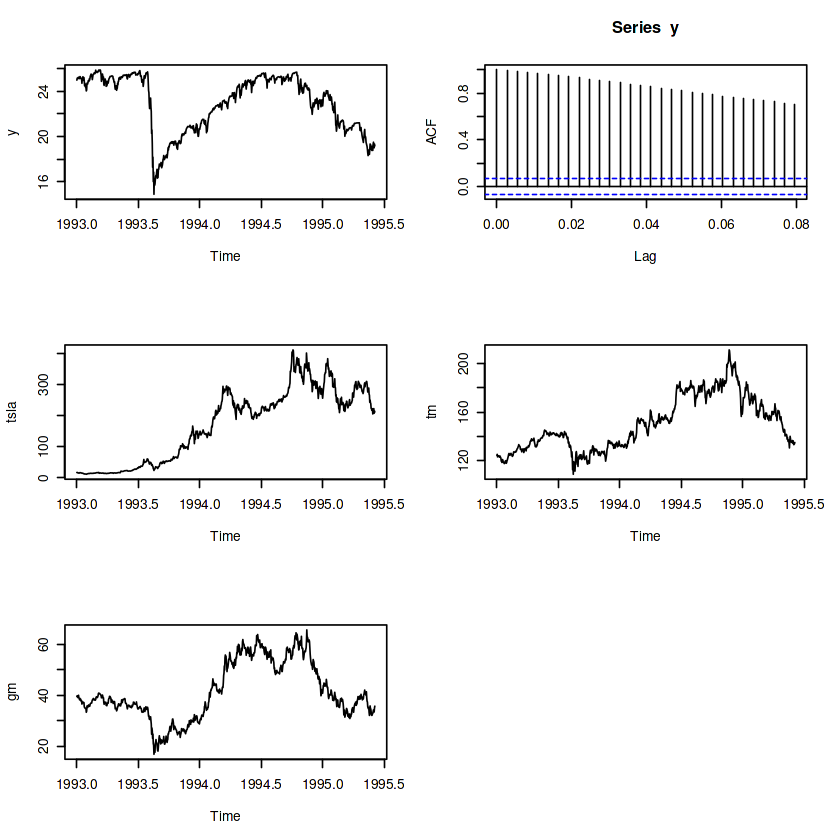

In [62]:
par(mfrow=c(3,2))
ts.plot(merged_prices_diff$RYLD)
acf(merged_prices_diff$RYLD)
ts.plot(merged_prices_diff$TSLA)
ts.plot(merged_prices_diff$TM)
ts.plot(merged_prices_diff$GM)


## Prueba de estacionariedad

In [63]:
# Comprobemos que las series no son estacionarias. 
library(fUnitRoots)
adfTest(y)
adfTest(tsla)
adfTest(gm)
adfTest(tm)



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.9632
  P VALUE:
    0.3093 

Description:
 Fri May 24 01:25:00 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0953
  P VALUE:
    0.586 

Description:
 Fri May 24 01:25:00 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.4868
  P VALUE:
    0.4612 

Description:
 Fri May 24 01:25:00 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0974
  P VALUE:
    0.5853 

Description:
 Fri May 24 01:25:00 2024 by user: 

In [64]:
y_df <- data.frame(date = time(y), y = as.numeric(y))
tsla_df <- data.frame(date = time(tsla), tsla = as.numeric(tsla))
tm_df <- data.frame(date = time(tm), tm = as.numeric(tm))
gm_df <- data.frame(date = time(gm), gm = as.numeric(gm))

# Combinar los data frames en uno solo por la columna 'date'
merged_df <- merge(y_df, tsla_df, by = "date")
merged_df <- merge(merged_df, tm_df, by = "date")
merged_df <- merge(merged_df, gm_df, by = "date")


In [71]:
devtools::install_version("pbkrtest", version = "0.5.1")



xfun       (0.41   -> 0.44  ) [CRAN]
rlang      (1.1.2  -> 1.1.3 ) [CRAN]
glue       (1.6.2  -> 1.7.0 ) [CRAN]
cli        (3.6.1  -> 3.6.2 ) [CRAN]
fansi      (1.0.5  -> 1.0.6 ) [CRAN]
tidyselect (1.2.0  -> 1.2.1 ) [CRAN]
Rcpp       (1.0.11 -> 1.0.12) [CRAN]
fs         (1.6.3  -> 1.6.4 ) [CRAN]
yaml       (2.3.7  -> 2.3.8 ) [CRAN]
tidyr      (1.3.0  -> 1.3.1 ) [CRAN]
backports  (1.4.1  -> 1.5.0 ) [CRAN]
knitr      (1.45   -> 1.46  ) [CRAN]
broom      (1.0.5  -> 1.0.6 ) [CRAN]


Installing 13 packages: xfun, rlang, glue, cli, fansi, tidyselect, Rcpp, fs, yaml, tidyr, backports, knitr, broom

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
devtools::install_github("Natsiopoulos/ARDL")

rlang      (1.1.2  -> 1.1.3 ) [CRAN]
glue       (1.6.2  -> 1.7.0 ) [CRAN]
cli        (3.6.1  -> 3.6.2 ) [CRAN]
fansi      (1.0.5  -> 1.0.6 ) [CRAN]
fs         (1.6.3  -> 1.6.4 ) [CRAN]
Rcpp       (1.0.11 -> 1.0.12) [CRAN]
tidyselect (1.2.0  -> 1.2.1 ) [CRAN]


Skipping 1 packages not available: pbkrtest

Installing 7 packages: rlang, glue, cli, fansi, fs, Rcpp, tidyselect

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error: Failed to install 'ARDL' from GitHub:
  lazy-load database '/usr/local/lib/R/site-library/pkgbuild/R/pkgbuild.rdb' is corrupt


In [81]:
install.packages("ARDL")
library(ARDL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL



In [86]:
merged_df

date,y,tsla,tm,gm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993.000,24.995,17.51667,124.16,39.50
1993.003,25.157,17.59333,124.94,39.83
1993.005,25.189,17.24400,122.88,39.72
1993.008,25.130,16.50867,123.19,39.11
1993.011,25.225,15.67600,123.62,39.68
1993.014,25.250,16.09800,123.81,40.01
1993.016,25.211,15.91267,123.60,38.95
1993.019,25.124,15.60067,122.92,38.75
1993.022,25.141,16.27333,122.59,38.25


In [88]:
ts.Pr = ts(merged_df)
modelARDL <- auto_ardl(y ~ tsla + tm + gm, data = ts.Pr, max_order = 4)

ERROR: Error in stringr::str_split(formula, pattern = "[|]"): lazy-load database '/usr/local/lib/R/site-library/stringi/R/stringi.rdb' is corrupt
